In [12]:
cats_craig = sorted(c_hippocraticum["work_cat_craik"].unique().tolist())
cats_craig

['Anatomy and physiology',
 'Cases and signs',
 'Guidance and ideals',
 'Gynaecology and embryology',
 'Nosology, pathology, therapy',
 'Scientific principles',
 'Surgery']

In [13]:
cats_linka = sorted(c_hippocraticum["work_cat_linka"].unique().tolist(), reverse=True)
cats_linka

['Theoretical', 'Practical', 'Other']

In [14]:
cat_dfs = {}
for category_column in ["work_cat_jouanna", "work_cat_craik", "work_cat_linka"]:
    cat_df = c_hippocraticum.groupby(category_column).sum().drop(['date_avr', 'date_manual', "λύπ*_TF", "ἄλγ*_TF", "ὀδύν*_TF", "πόνο*_TF", 'TF_sum'], axis=1)
    cat_df["N_docs"] = c_hippocraticum.groupby(category_column).size()
    for term in ["πόνο*", "ὀδύν*", "ἄλγ*", "λύπ*"]:
        cat_df[term + "_TF"] = cat_df.apply(lambda row: np.round(row[term] / row["wordcount"], 6), axis=1)
        cat_df[term + "_TF"] = cat_df.apply(lambda row: np.round(row[term] / row["wordcount"], 6), axis=1)
    cat_df["TF_sum"] = cat_df.apply(lambda row: np.round((row["λύπ*"] + row["ἄλγ*"] + row["ὀδύν*"] + row["πόνο*"]) / row["wordcount"], 6), axis=1)
    cat_dfs[category_column] = cat_df

In [15]:
cat_dfs["work_cat_linka"] = cat_dfs["work_cat_linka"].sort_index(ascending=False)
cat_dfs["work_cat_linka"]

,wordcount,n_sentences,lemmata_wordcount,πόνο*,ὀδύν*,ἄλγ*,λύπ*,terms_sum,N_docs,πόνο*_TF,ὀδύν*_TF,ἄλγ*_TF,λύπ*_TF,TF_sum
work_cat_linka,,,,,,,,,,,,,,
Theoretical,36495,2501,18452,175,25,16,11,227,4,0.004795,0.000685,0.000438,0.000301,0.006220
Practical,52044,5044,28942,172,122,106,5,405,5,0.003305,0.002344,0.002037,0.000096,0.007782
Other,244904,16911,123938,310,498,193,42,1043,43,0.001266,0.002033,0.000788,0.000171,0.004259


In [16]:
cat_dfs["work_cat_craik"]

,wordcount,n_sentences,lemmata_wordcount,πόνο*,ὀδύν*,ἄλγ*,λύπ*,terms_sum,N_docs,πόνο*_TF,ὀδύν*_TF,ἄλγ*_TF,λύπ*_TF,TF_sum
work_cat_craik,,,,,,,,,,,,,,
Anatomy and physiology,20295,1324,9570,28,32,15,2,77,7,0.001380,0.001577,0.000739,0.000099,0.003794
Cases and signs,33481,3025,18240,105,113,62,7,287,7,0.003136,0.003375,0.001852,0.000209,0.008572
Guidance and ideals,40499,3924,22013,112,38,86,9,245,11,0.002766,0.000938,0.002124,0.000222,0.006050
Gynaecology and embryology,73311,5289,40363,79,163,68,5,315,7,0.001078,0.002223,0.000928,0.000068,0.004297
"Nosology, pathology, therapy",70273,4726,35253,149,272,74,17,512,5,0.002120,0.003871,0.001053,0.000242,0.007286
Scientific principles,46689,3066,22668,161,5,8,17,191,7,0.003448,0.000107,0.000171,0.000364,0.004091
Surgery,48895,3102,23225,23,22,2,1,48,8,0.000470,0.000450,0.000041,0.000020,0.000982


In [17]:
cat_dfs.keys()

dict_keys(['work_cat_jouanna', 'work_cat_craik', 'work_cat_linka'])

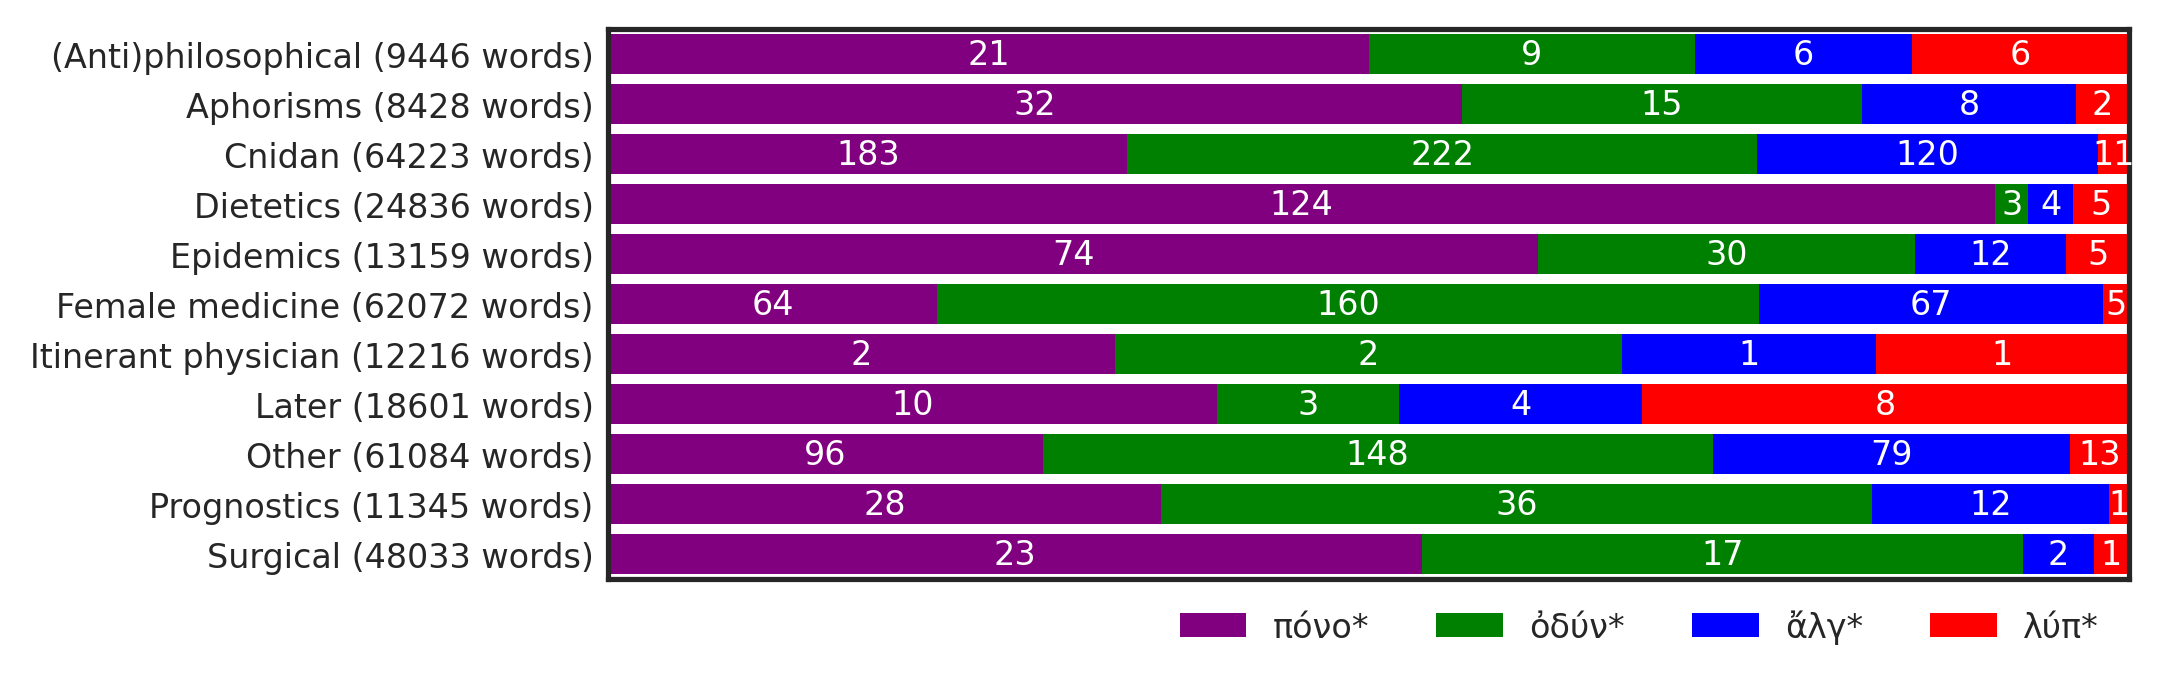

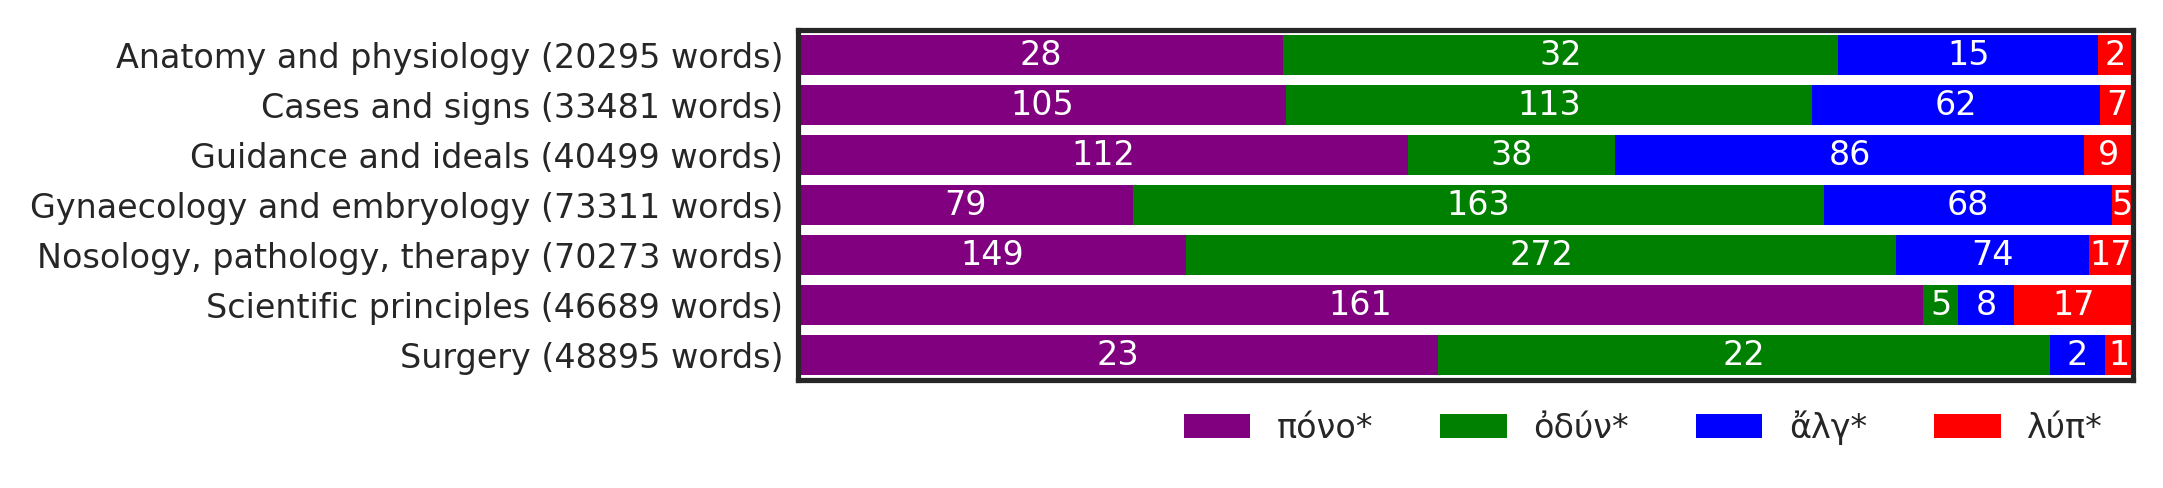

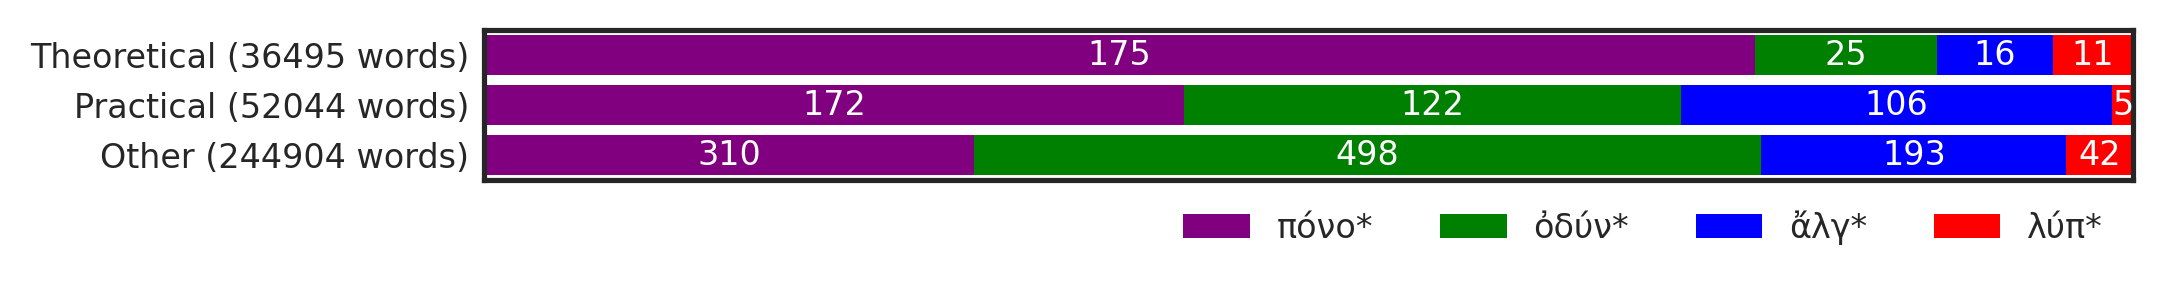

In [26]:
plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.size'] = 8


keys_figs_tups = []

for key in cat_dfs.keys():
    # extract the dataframe (in reverse order)
    c_hippocraticum_by_cat = cat_dfs[key][::-1]
    # prepare the data
    data, labels, counts, ratios = [], [], [], [] # prepare for empty lists 
    for n in range(len(c_hippocraticum_by_cat)):
        label = str(c_hippocraticum_by_cat.index[n]) + " (" + str(int(c_hippocraticum_by_cat.iloc[n]["wordcount"])) + " words)"
        labels.append(label)
        cat_counts = c_hippocraticum_by_cat.iloc[n][["πόνο*", "ὀδύν*", "ἄλγ*", "λύπ*"]].tolist()
        counts.append(cat_counts)
        cat_ratios = [val / c_hippocraticum_by_cat.iloc[n]["terms_sum"] * 100 for val in  cat_counts] # if val > 0]
        cat_ratios = [0 if math.isnan(x) else x for x in cat_ratios]
        ratios.append(cat_ratios)
    # extract the dataframe (in reverse order)
    counts = np.array(counts)
    ratios = np.array(ratios)
    ratios_cum = ratios.cumsum(axis=1)
    category_colors = ["Purple", "Green", "Blue", "Red"]
    terms = ["πόνο*", "ὀδύν*", "ἄλγ*", "λύπ*"]

    fig, ax = plt.subplots(figsize=(7.25, (len(c_hippocraticum_by_cat) / 6) + 0.5), tight_layout=True)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)

    ax.set_xlim(0, np.sum(ratios, axis=1).max())
    ax.set_ylim(-0.5, len(c_hippocraticum_by_cat) - 0.5)

    for i, (term, color) in enumerate(zip(terms, category_colors)):
              widths = ratios[:, i]
              texts = counts[:, i]
              starts = ratios_cum[:, i] - widths
              ax.barh(labels, widths, left=starts,
                      label=term, color=color)
              xcenters = starts + widths / 2
              for y, (x, c) in enumerate(zip(xcenters, texts)):
                  if int(c) > 0:
                    ax.text(x, y, str(int(c)), ha='center', va='center', color='white')
                  else:
                    ax.text(x, y, "", ha='center', va='center', color='white')
    ax.legend(ncol=len(terms), bbox_to_anchor=(1, 0), fontsize=8) #'small') # loc='lower left'
    
    #ax.set_title("Pain words ratios by work categories by " + key.rpartition("_")[2].capitalize())
    keys_figs_tups.append((key, fig))



In [27]:
for key_fig in keys_figs_tups:
    key_fig[1].savefig("../figures/c_hip_ratios_by_cat_{0}.png".format(key_fig[0].rpartition("_")[2]))

In [32]:
conf = sddk.configure()

sciencedata.dk username (format '123456@au.dk'): 648597@au.dk
sciencedata.dk password: ········
endpoint variable has been configured to: https://sciencedata.dk/files/


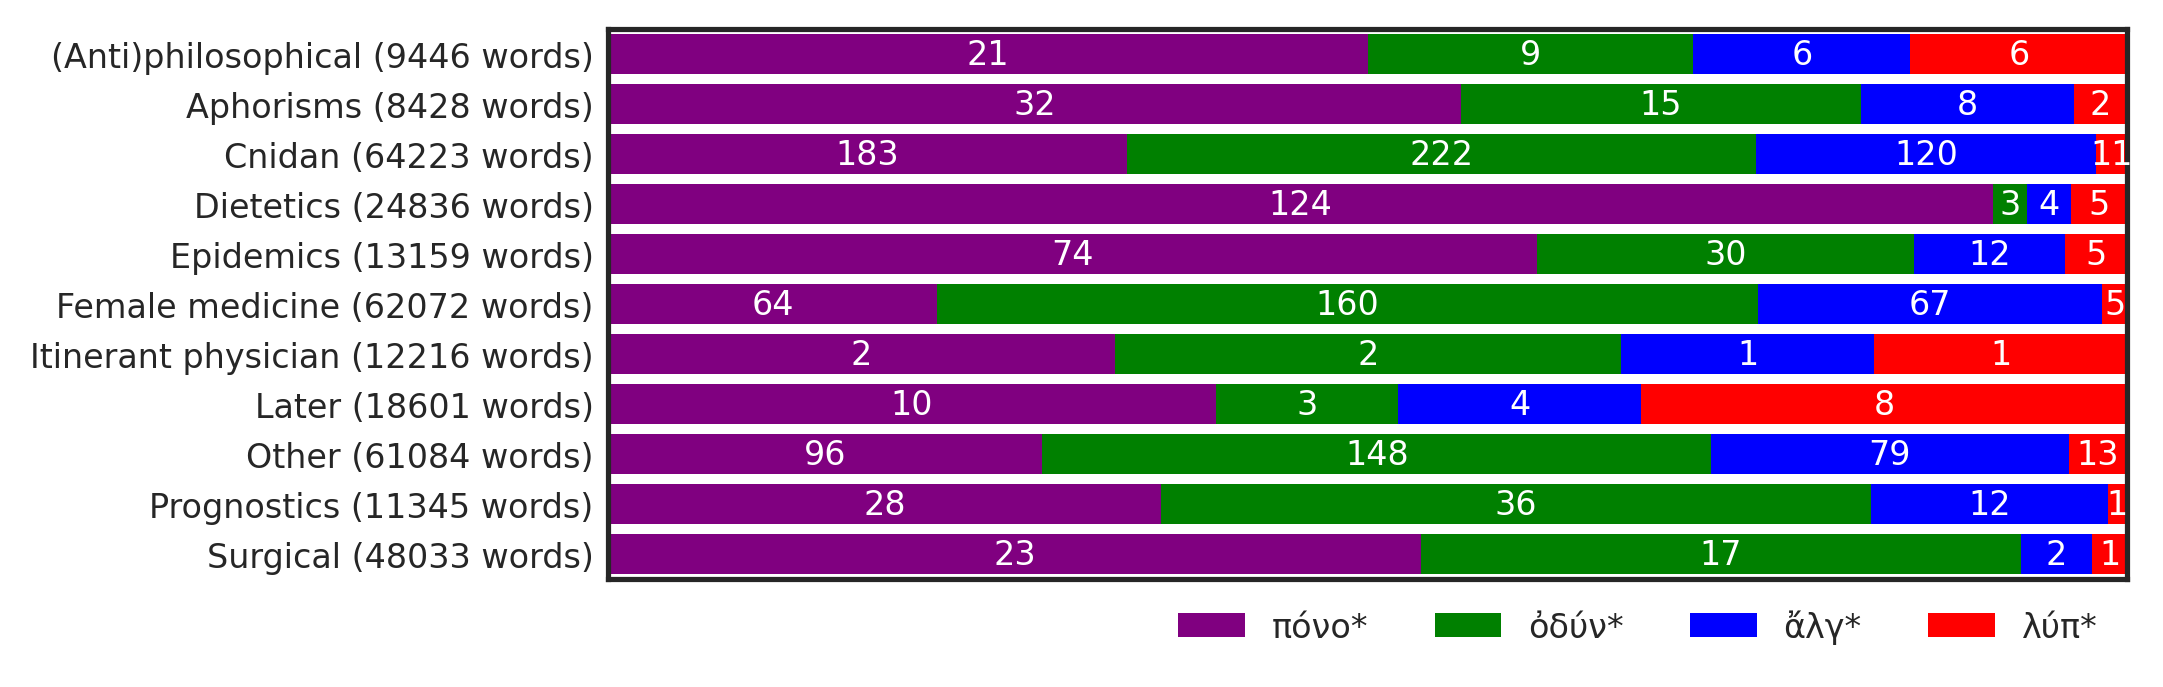

In [30]:
keys_figs_tups[0][1]

In [34]:
sddk.write_file("public_data/PIA/c_hip_ratios_by_cat_jouanna.png", keys_figs_tups[0][1], conf)

A file with the same name ("c_hip_ratios_by_cat_jouanna.png") already exists in this location.
Press Enter to overwrite it or choose different path and filename: 
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/public_data/PIA/c_hip_ratios_by_cat_jouanna.png"


In [38]:
c_hippocraticum.columns

Index(['filename', 'author', 'title', 'wordcount', 'author_id', 'doc_id',
       'raw_date', 'date_avr', 'date_probs', 'date_manual', 'provenience',
       'tlg_epithet', 'clean_string', 'n_sentences', 'lemmatized_sentences',
       'lemmata', 'lemmata_wordcount', 'lemmata_repl',
       'lemmatized_sentences_repl', 'πόνο*', 'ὀδύν*', 'ἄλγ*', 'λύπ*',
       'terms_sum', 'πόνο*_TF', 'ὀδύν*_TF', 'ἄλγ*_TF', 'λύπ*_TF', 'TF_sum',
       'work_cat_jouanna', 'work_cat_craik', 'work_cat_linka'],
      dtype='object')

In [39]:
# as an input for vectorization, we need the documents in a form of strings
# we need two lists:
# (1) list of strings
# (2) list of work names
strings = [" ".join(lemmata) for lemmata in c_hippocraticum["lemmata"].tolist()]
titles = c_hippocraticum["title"].tolist()

In [40]:
# build gensim dictionary on the basis of whole works
lemmata = c_hippocraticum["lemmata_repl"].tolist()
dictionary = corpora.Dictionary(lemmata)
vocabulary = [dictionary[word_id] for word_id in dictionary if dictionary.dfs[word_id] >= 5]

In [41]:
wordcounts = c_hippocraticum["wordcount"].tolist()

In [42]:
len(vocabulary)

2033

In [44]:
c_hip_vec = make_vec_df(strings, titles, vocabulary)
c_hip_vec[0]

,Κοίλη,αἰτία,αἴσθησις,αἴτιος,αὐξάνω,αὐτόματος,αὐτός,αὔξησις,βέλτιστος,βία,...,μίλτος,ξύων,στυπτηρίην,χήν,ἀναδέω,ἀνακλίνω,ὅλμος,χλιερῷ,σφαγή,ἀνοίγνυμι
De prisca medicina,0.000723,0.001626,0.000181,0.000542,0.000723,0.000181,0.004156,0.000542,0.000361,0.000181,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
De aëre aquis et locis,0.000133,0.000133,0.000000,0.000933,0.000666,0.000000,0.004799,0.000267,0.000000,0.000400,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Prognosticon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001725,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
De diaeta in morbis acutis,0.000000,0.000000,0.000000,0.000163,0.000000,0.000326,0.002121,0.000000,0.000163,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
De diaeta acutorum (Sp.),0.000000,0.000575,0.000000,0.000383,0.000383,0.000192,0.001533,0.000000,0.000575,0.000575,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Epidemiae,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001378,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
De capitis vulneribus,0.000401,0.000000,0.000000,0.000000,0.000000,0.000401,0.004210,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
De officina medici,0.000000,0.000466,0.000000,0.000000,0.000000,0.000000,0.003263,0.000466,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
De fracturis,0.000000,0.000089,0.000000,0.000089,0.000000,0.000000,0.002670,0.000000,0.000089,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
De articulis,0.000000,0.000141,0.000000,0.000094,0.000329,0.000141,0.002722,0.000516,0.000000,0.000141,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Cosine similarity/distance

# Distances - work categories by Jouanna

In [45]:
color_keys = c_hippocraticum["work_cat_jouanna"].unique().tolist()
print(color_keys)

['(Anti)philosophical', 'Itinerant physician', 'Prognostics', 'Other', 'Epidemics', 'Surgical', 'Aphorisms', 'Cnidan', 'Later', 'Dietetics', 'Female medicine']


In [46]:
data =  c_hip_vec[2]

tsne = TSNE(n_components=2, random_state=1, perplexity=8, metric='precomputed') # dissimilarity="precomputed",

pos = tsne.fit_transform(data)
xs, ys = pos[:, 0], pos[:, 1]

# extract minimal and maximal values
minmax = [pos[:, 0].min(), pos[:, 0].max(), pos[:, 1].min(), pos[:, 1].max()]

# normalize on scale from 0 to 1
xs = (xs - minmax[0]) / (minmax[1] - minmax[0])
ys = (ys - minmax[2]) / (minmax[3] - minmax[2])

# https://matplotlib.org/3.1.0/gallery/color/named_colors.html
colors_list = list(mcolors.TABLEAU_COLORS.keys()) + list(mcolors.BASE_COLORS.keys())
print(colors_list)

color_keys = c_hippocraticum["work_cat_jouanna"].unique().tolist()
color_values = colors_list[:len(color_keys)]
works_colors_dict = dict(zip(color_keys, color_values))
works_colors_dict

['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']


{'(Anti)philosophical': 'tab:blue',
 'Itinerant physician': 'tab:orange',
 'Prognostics': 'tab:green',
 'Other': 'tab:red',
 'Epidemics': 'tab:purple',
 'Surgical': 'tab:brown',
 'Aphorisms': 'tab:pink',
 'Cnidan': 'tab:gray',
 'Later': 'tab:olive',
 'Dietetics': 'tab:cyan',
 'Female medicine': 'b'}

In [47]:
# manual modifications of automatically assinged colors
works_colors_dict["Other"] = "lightgray"
works_colors_dict["Later"] = "darkgray"
works_colors_dict["Cnidan"] = "tab:red"
works_colors_dict

{'(Anti)philosophical': 'tab:blue',
 'Itinerant physician': 'tab:orange',
 'Prognostics': 'tab:green',
 'Other': 'lightgray',
 'Epidemics': 'tab:purple',
 'Surgical': 'tab:brown',
 'Aphorisms': 'tab:pink',
 'Cnidan': 'tab:red',
 'Later': 'darkgray',
 'Dietetics': 'tab:cyan',
 'Female medicine': 'b'}

In [48]:
# manually change order of work categories
color_keys = ['(Anti)philosophical', 'Itinerant physician', 'Prognostics', 'Epidemics', 'Surgical', 'Aphorisms', 'Cnidan', 'Dietetics', 'Female medicine', 'Later','Other']
# use it to rearrange the color values
color_values = [works_colors_dict[key] for key in color_keys]

In [53]:
sddk.write_file("public_data/PIA/c_hip_distances_by_cat_jouanna.png", fig, conf)

A file with the same name ("c_hip_distances_by_cat_jouanna.png") already exists in this location.
Press Enter to overwrite it or choose different path and filename: 
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/public_data/PIA/c_hip_distances_by_cat_jouanna.png"


# Distances - work categories by Craik

In [54]:
color_keys = c_hippocraticum["work_cat_craik"].unique().tolist()
color_values = colors_list[:len(color_keys)]
works_colors_dict = dict(zip(color_keys, color_values))
works_colors_dict

{'Scientific principles': 'tab:blue',
 'Cases and signs': 'tab:orange',
 'Nosology, pathology, therapy': 'tab:green',
 'Surgery': 'tab:red',
 'Guidance and ideals': 'tab:purple',
 'Anatomy and physiology': 'tab:brown',
 'Gynaecology and embryology': 'tab:pink'}

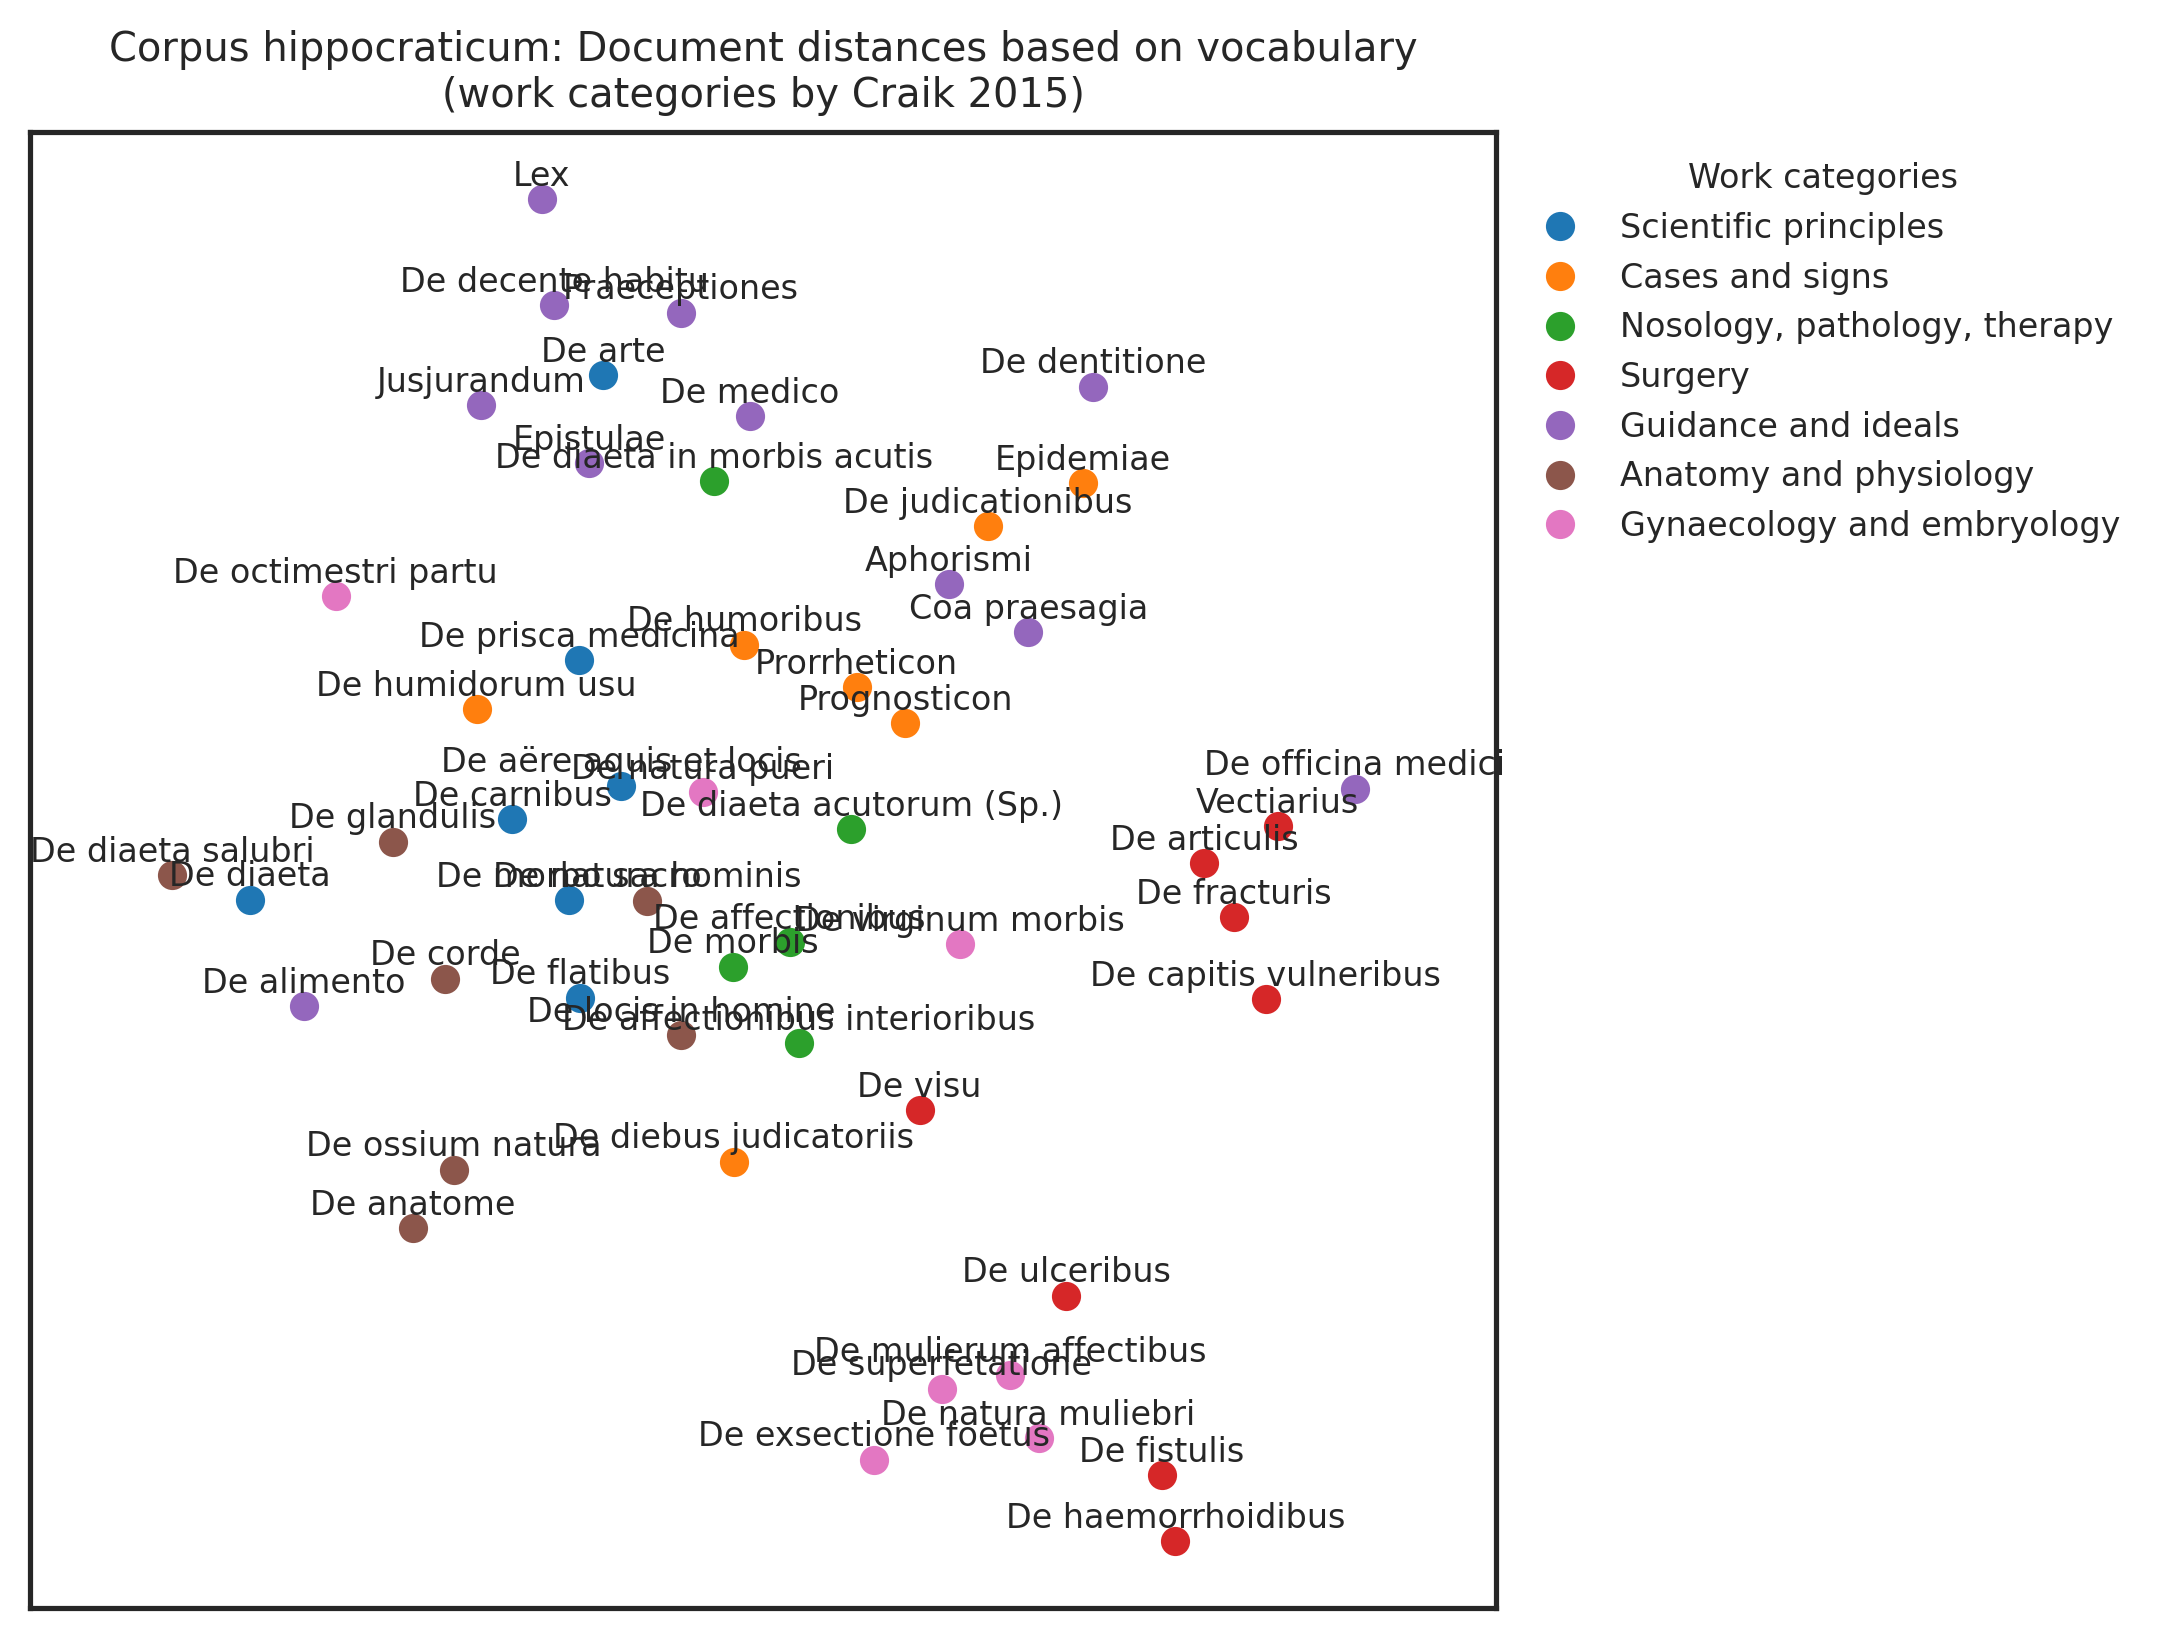

In [57]:
fig, ax = plt.subplots(figsize=(7.25,5.5), tight_layout=True)

work_colors = list(c_hippocraticum["work_cat_craik"].apply(lambda x: works_colors_dict[x]))


for x, y, name, color in zip(xs, ys, c_hip_vec[0].index, work_colors):
    ax.scatter(x, y, c=np.array([color]))
    #x = x- 0.06 #v(2 * len(name))
    ax.text(x, y + 0.01, name, horizontalalignment='center', fontsize=8)


ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_xlim(- 0.12, 1.12)
title = "Corpus hippocraticum: Document distances based on vocabulary\n(work categories by Craik 2015)"
ax.set_title(title)

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_values]
plt.legend(markers, color_keys, numpoints=1,  title="Work categories", fontsize=8, bbox_to_anchor=(1,1), loc="upper left")

In [58]:
fig.savefig("../figures/c_hip_distances_by_cat_craik.png")

In [60]:
sddk.write_file("public_data/PIA/c_hip_distances_by_cat_craik.png", fig, conf)

A file with the same name ("c_hip_distances_by_cat_craik.png") already exists in this location.
Press Enter to overwrite it or choose different path and filename: 
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/public_data/PIA/c_hip_distances_by_cat_craik.png"


In [61]:
### also save the dataset with additional columns we created here

c_hippocraticum.to_json("../data/c_hippocraticum_enriched.json")